# A* Motion Planning

In [2]:
# The autoreload extension will automatically load in new code as you edit files, 
# so you don't need to restart the kernel every time
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate
from astar import DetOccupancyGrid2D, AStar
from utils import generate_planning_problem

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
from asl_tb3_lib.navigation import TrajectoryPlan

## Simple Environment
(Please submit resulting plot from this section in your write-up)
### Workspace

In [16]:
width = 10
height = 10
obstacles = [((6,7),(8,8)),((2,2),(4,3)),((2,5),(4,7)),((6,3),(8,5))]
occupancy = DetOccupancyGrid2D(width, height, obstacles)

### Starting and final positions

In [17]:
x_init = (1, 9)
x_goal = (9, 1)

### Run A* planning

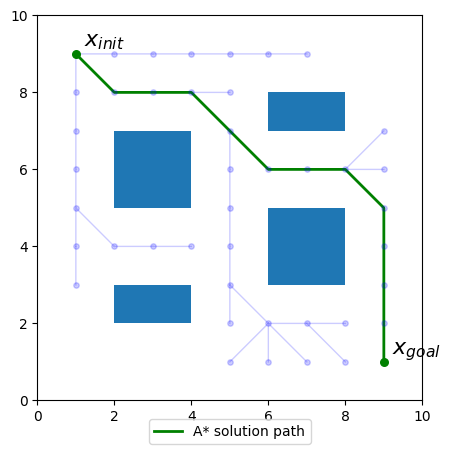

In [18]:
astar = AStar((0, 0), (width, height), x_init, x_goal, occupancy)
if not astar.solve():
    print("No path found")
else:
    plt.rcParams['figure.figsize'] = [5, 5]
    astar.plot_path()
    astar.plot_tree()

## Random Cluttered Environment
### Generate workspace, start and goal positions
(Try changing these and see what happens)

In [29]:
width = 10
height = 10
num_obs = 25
min_size = .5
max_size = 3

occupancy, x_init, x_goal = generate_planning_problem(width, height, num_obs, min_size, max_size)

### Run A* planning

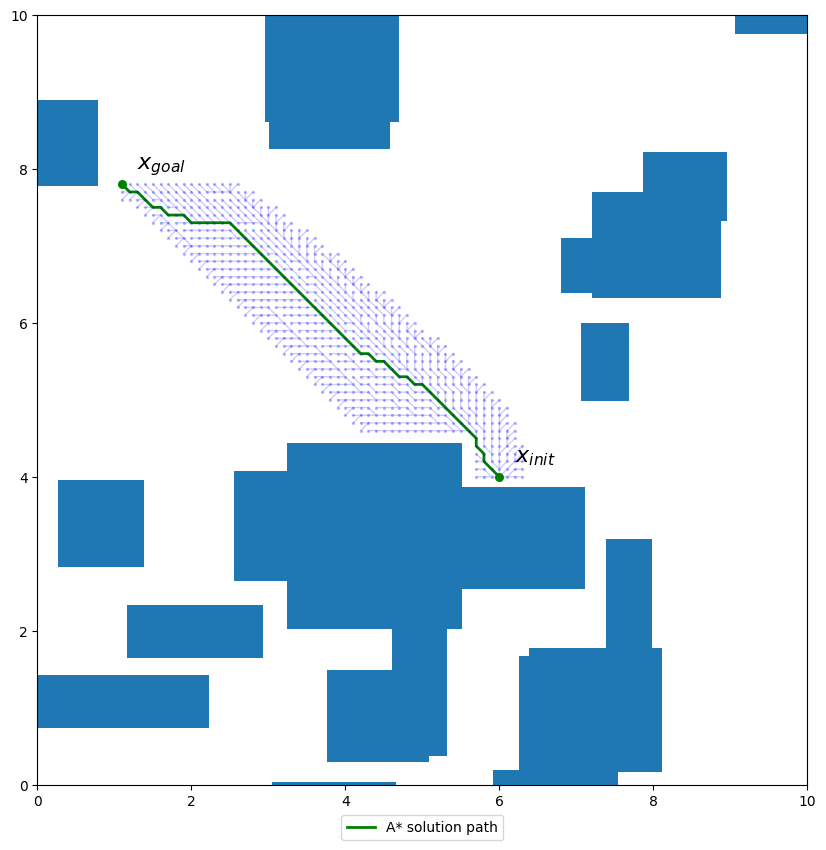

In [30]:
astar = AStar((0, 0), (width, height), x_init, x_goal, occupancy, resolution=0.1)
if not astar.solve():
    print("No path found! (This is normal, try re-running the block above)")
else:
    plt.rcParams['figure.figsize'] = [10, 10]
    astar.plot_path()
    astar.plot_tree(point_size=2)

# Smooth Trajectory 

In [ ]:
def compute_smooth_plan(path, v_desired=0.15, spline_alpha=0.05) -> TrajectoryPlan:
    # Ensure path is a numpy array
    path = np.asarray(astar.path)
    # Compute and set the following variables:
    #   1. ts: 
    #      Compute an array of time stamps for each planned waypoint assuming some constant 
    #      velocity between waypoints. 
    #
    #   2. path_x_spline, path_y_spline:
    #      Fit cubic splines to the x and y coordinates of the path separately
    #      with respect to the computed time stamp array.
    #      Hint: Use scipy.interpolate.splrep
    
    ##### YOUR CODE STARTS HERE #####
    ts = [0]
    for i in range(1, len(path)):
        ts.append(ts[-1] + np.linalg.norm((path[i] - path[i-1]))/v_desired)

    ts = np.asarray(ts)
    path_x_spline = scipy.interpolate.splrep(ts, path[:, 0], s=spline_alpha)

    path_y_spline = scipy.interpolate.splrep(ts, path[:, 1], s=spline_alpha)
    ###### YOUR CODE END HERE ######
    
    return TrajectoryPlan(
        path=path,
        path_x_spline=path_x_spline,
        path_y_spline=path_y_spline,
        duration=ts[-1],
    )

In [41]:
# construct a trajectory plan
plan = compute_smooth_plan(astar.path)

[ 0.          0.94280904  1.88561808  2.55228475  3.49509379  4.16176046
  5.1045695   6.04737854  6.99018758  7.93299662  8.87580567  9.81861471
 10.76142375 11.42809042 12.37089946 13.03756612 13.98037517 14.92318421
 15.58985087 16.53265992 17.19932658 18.14213562 19.08494467 20.02775371
 20.97056275 21.91337179 22.85618083 23.79898987 24.74179891 25.68460796
 26.627417   27.57022604 28.51303508 29.45584412 30.39865316 31.34146221
 32.28427125 33.22708029 33.89374696 34.56041362 35.22708029 35.89374696
 36.56041362 37.50322266 38.16988933 38.836556   39.77936504 40.44603171
 41.38884075 42.33164979 42.99831646 43.9411255 ]


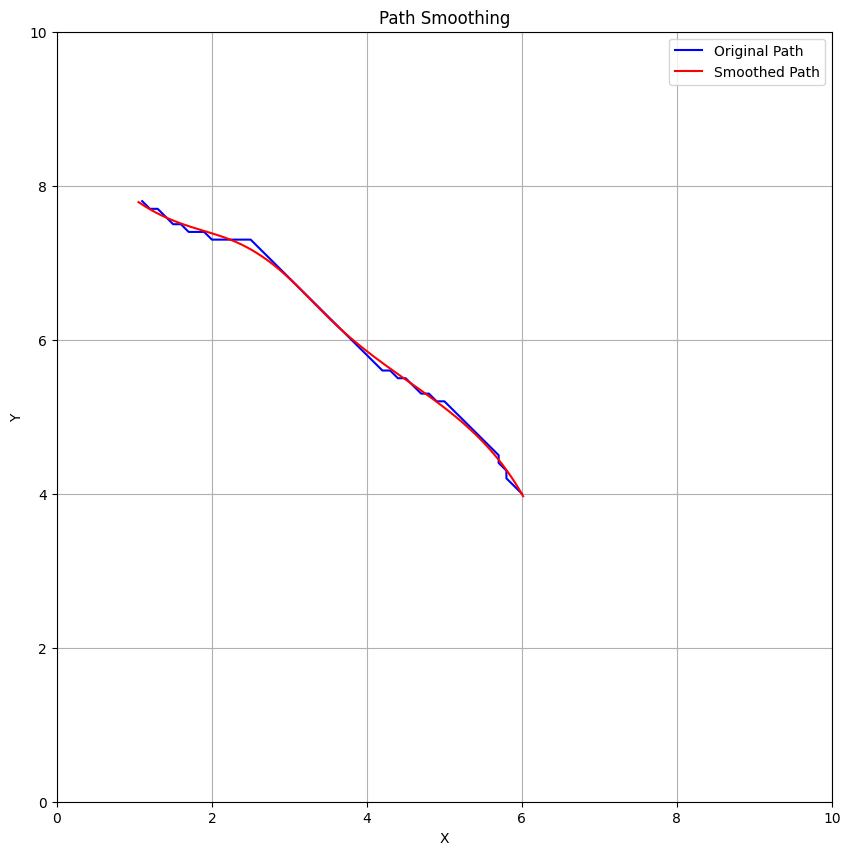

In [39]:
# plot AStar path v.s. smoothed path
astar_path = np.asarray(astar.path)
smoothed_path = plan.smoothed_path()

plt.plot(astar_path[:,0], astar_path[:,1], 'b-', label='Original Path')
plt.plot(smoothed_path[:, 0], smoothed_path[:, 1], 'r-', label='Smoothed Path')
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.xlim([0, width])
plt.ylim([0, height])
plt.title('Path Smoothing')
plt.grid()